# Olympic History through 120 years: Athletes and Results


<br>

The database contains historical data from the Olympic Games, including details about the athletes, the events they participated in, and the medals won. Our analysis will explore long-term Olympic success trends for leading medal countries like the US, China, Germany, Russia and Canada measured by total medals and medals per athlete. We hypothesize these nations will rank highest historically in absolute medal counts. However, assessing medals relative to athletes sent and population size is expected to reveal different emerging "per capita" leaders, potentially representing smaller countries that excel in athlete development. By quantifying absolute and relative performance over 120 years, we aim to reveal insights on national sports competitiveness while identifying countries punching above their weight.  A complementary research on geopolitical factors offers additional context for better understanding of the insights and changes over the years.


## Environment Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Configure to avoid unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

[Kaggle link to the Raw Data.](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

In [2]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
olympic_filename = "athlete_events.csv"
noc_filename = "noc_regions.csv"

# Read the CSV files and create backup copies
olympic_df_data = pd.read_csv(data_path + olympic_filename)
noc_df_data = pd.read_csv(data_path + noc_filename)

# Create working copies of the dataframes for analysis
olympic_df = olympic_df_data.copy()
noc_df = noc_df_data.copy()

We are reading two CSV files: the main one containing Olympic athlete events and another with the NOC Codes (National Olympic Committees) and the full name of the countries.

In [3]:
pd.set_option('display.max_columns',None)
olympic_df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
195789,98308,Khalid Raghib,M,22.0,180.0,70.0,Morocco,MAR,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,NaN
243016,121701,Mrioara Trac (-Curelea),F,21.0,172.0,68.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Rowing,Rowing Women's Coxed Eights,Silver
265866,133023,Martin Laumann Ylven,M,21.0,190.0,92.0,Norway,NOR,2010 Winter,2010,Winter,Vancouver,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
144505,72524,"Wilhelm Bernhard Adolf Emil ""Willy"" Ltzow",M,19.0,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN
150954,75751,Jess Martnez Tejeda,M,20.0,163.0,48.0,Mexico,MEX,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Light-Flyweight,NaN


In [4]:
pd.set_option('display.max_columns',None)
noc_df.sample(5)

,NOC,region,notes
155,PAN,Panama,NaN
53,CYP,Cyprus,NaN
106,KEN,Kenya,NaN
151,NRU,Nauru,NaN
62,ESA,El Salvador,NaN


# Data Cleaning

## Duplicate Data Check

In [5]:
#Display types for each column
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
#Shows the rows that are duplicated
olympic_df[olympic_df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


These lines have a duplicated row in the Olympic dataset considering all their variables in the set. Hence, they can be completely removed as they are errors.

In [7]:
#Dimension of the original dataframe
olympic_df.shape 

(271116, 15)

In [8]:
#Dimension of the dataframe removing duplicates
olympic_df.drop_duplicates(inplace=True)
olympic_df.shape 

(269731, 15)

Here, the 1385 duplicate rows were removed.

## Cap & Floor Treatment

This method trims outliers to predefined thresholds, thereby lessening their potentially distorting effects on the analysis. A "cap" refers to setting an upper limit on data points to reduce the impact of extremely high outliers, while a "floor" establishes a lower limit to address very low outliers. 

In [9]:
#Descriptive statistic for the numerical columns
olympic_df[['Age', 'Height','Weight','Year']].describe()

,Age,Height,Weight,Year
count,260416.000000,210917.000000,208204.000000,269731.000000
mean,25.454776,175.338953,70.701778,1978.623073
std,6.163869,10.518507,14.349027,29.752055
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


The minimum and maximum values of all the numerical values are coherent and a "Cap & Floor" treatment for outliers is not required in our dataset.

## Missing Value Treatment

In [10]:
#Shows the na for each column
olympic_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

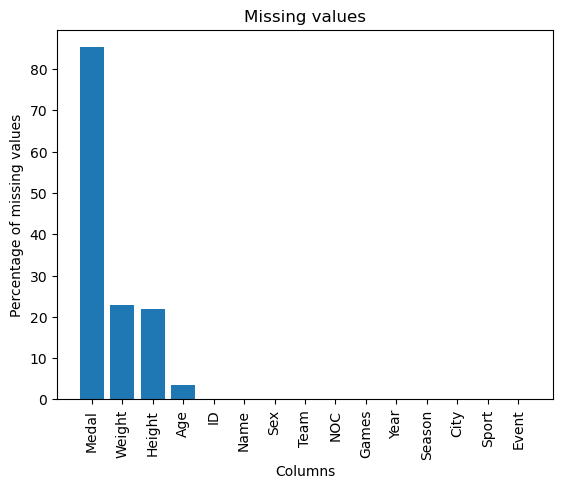

In [11]:
#Function that plots the empty values for each column
def visualize_null(dataframe,percentage=True):
    null_series=olympic_df.isna().sum().sort_values(ascending=False)
    if percentage:
        null_series=null_series/len(dataframe)*100

    plt.bar(x=null_series.index,height=null_series.values)

    if percentage:
        plt.ylabel('Percentage of missing values')
    else:
        plt.ylabel('Amount of missing values')
    plt.title('Missing values')
    plt.xlabel('Columns')
    plt.xticks(rotation=90)
    plt.show()

visualize_null(olympic_df)

The `Medal` is expected to have all those missing values, as most of the participants didn't received any medal. Those values will be changed for 'None' and we will also create a numerical variable (3 for Gold, 2 for Silver, 1 for Bronze and 0 for None) to use that variable to calculate performance KPIs. The `Weight`, `Height` and `Age` also require missing treatment and for those ones we will use the median values segmented by `Sport` and `Sex`. 

### Missing Treatment | Medal

In [12]:
# Fill missing values in the medal variable
olympic_df['Medal'].fillna("None", inplace=True) 
#Checking na in Medals
olympic_df.isna().sum()

ID            0
Name          0
Sex           0
Age        9315
Height    58814
Weight    61527
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

The following box shows the creation of a numerical variable for the medals, where a number is assigned: 3 for Gold, 2 for Silver, 1 for Bronze and 0 for NA values, this is done to obtain more detailed information and to plot charts considering this KPIs.

In [13]:
# Dictionary for replacement
medal_value_replace = {'None': 0, 'Gold': 3, 'Silver': 2, 'Bronze': 1}

# Create a new variable 'Medal_Value' in the dataframe
olympic_df['Medal_Value'] = olympic_df['Medal'].replace(medal_value_replace)

olympic_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Value
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,3
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,0


### Missing Treatment | Age, Height and Weight

In [14]:
# Function to replace NaN values with median values based on 'Sport' and 'Sex'
def replace_nan_with_median(olympic_df, var):
    median_per_sport_sex=olympic_df.groupby(['Sport','Sex'])[var].median().reset_index()

    # Merge the medians back to the original dataframe
    merged_df = olympic_df.merge(median_per_sport_sex, on=['Sport', 'Sex'], how='left', suffixes=('', '_median'))
    
    # Replace NaN values in 'Weight' with the corresponding median value
    merged_df[var].fillna(merged_df[var + '_median'], inplace=True)
    
    # Drop the auxiliary column
    merged_df.drop(columns=[var + '_median'], inplace=True)
    
    return merged_df


This section defines a function `replace_nan_with_median` to fill missing values in the `olympic_df` DataFrame. The function merges the median values with the original DataFrame and replaces NaN values in the column with these median values. After the replacement, a temporary DataFrame `olympic_df_temp` is created to store the results.

#### Age Missing Treatment

In [15]:
#Table grouped by Sport and Sex to get the median age
median_age_per_sport_sex=olympic_df.groupby(['Sport','Sex'])['Age'].median().reset_index()
median_age_per_sport_sex

,Sport,Sex,Age
0,Aeronautics,M,26.0
1,Alpine Skiing,F,22.0
2,Alpine Skiing,M,23.0
3,Alpinism,F,43.0
4,Alpinism,M,37.0
...,...,...,...
111,Water Polo,M,25.0
112,Weightlifting,F,23.0
113,Weightlifting,M,25.0
114,Wrestling,F,25.0


Creation of a DataFrame containing the median of the `Age` segmented by `Sport` and `Sex`. 

In [16]:
#Checking for any na in the new dataset
median_age_per_sport_sex.isna().sum()

Sport    0
Sex      0
Age      0
dtype: int64

In [17]:
# Function to replace NaN values with the median values
olympic_df_temp = replace_nan_with_median(olympic_df, 'Age')
#Checking na in Age 
olympic_df_temp.isna().sum()

ID                 0
Name               0
Sex                0
Age                0
Height         58814
Weight         61527
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal              0
Medal_Value        0
dtype: int64

In [18]:
#Validation was successful, we overwrite the original table
olympic_df = olympic_df_temp

#### Height Missing Treatment

This section follows the same procedure as the previous one but is specifically addressing the `Height` variable.

In [19]:
#Table grouped by Sport and Sex to get the median Height
median_height_per_sport_sex=olympic_df.groupby(['Sport','Sex'])['Height'].median().reset_index()
median_height_per_sport_sex

,Sport,Sex,Height
0,Aeronautics,M,NaN
1,Alpine Skiing,F,168.0
2,Alpine Skiing,M,178.0
3,Alpinism,F,NaN
4,Alpinism,M,NaN
...,...,...,...
111,Water Polo,M,187.0
112,Weightlifting,F,160.0
113,Weightlifting,M,170.0
114,Wrestling,F,164.0


In [20]:
median_height_per_sport_sex.isna().sum() #Checking NAN values in combinations

Sport      0
Sex        0
Height    10
dtype: int64

This time, we have some groups without information. Those `Sport` groups don't have enough volume so we can delete them without significantly altering the conclusions of the analysis.

In [21]:
# Replace NaN values with the median values
olympic_df_temp = replace_nan_with_median(olympic_df, 'Height')
olympic_df_temp

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Value
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,0
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,0
3,4,Edgar Lindenau Aabye,M,34.0,182.0,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,3
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,0
269727,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,0
269728,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,0
269729,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,0


In [22]:
#Checking for na in Height
olympic_df_temp.isna().sum()

ID                 0
Name               0
Sex                0
Age                0
Height           100
Weight         61527
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal              0
Medal_Value        0
dtype: int64

With the proposed treatment we go from 58k to 100k missing values in `Height`. We consider this as successful and will delete those rows later.

In [23]:
#Validation was successful, we overwrite the original table
olympic_df = olympic_df_temp

#### Weight Missing Treatment

This section is doing the same procedure as the previous but for the `Weight` variable.

In [24]:
#Table grouped by Sport and Sex to get the median Weight
median_weight_per_sport_sex=olympic_df.groupby(['Sport','Sex'])['Weight'].median().reset_index()
median_weight_per_sport_sex

,Sport,Sex,Weight
0,Aeronautics,M,NaN
1,Alpine Skiing,F,62.0
2,Alpine Skiing,M,78.0
3,Alpinism,F,NaN
4,Alpinism,M,NaN
...,...,...,...
111,Water Polo,M,87.0
112,Weightlifting,F,63.0
113,Weightlifting,M,75.0
114,Wrestling,F,61.0


In [25]:
#Checking for any na
median_weight_per_sport_sex.isna().sum()

Sport      0
Sex        0
Weight    14
dtype: int64

Similar to the `Height`, the `Weight` also have some groups without information and we remove these rows as well.

In [26]:
# Function to replace NaN values with the median values
olympic_df_temp = replace_nan_with_median(olympic_df, 'Weight')
olympic_df_temp

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Value
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,0
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,0
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,3
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,0
269727,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,0
269728,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,0
269729,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,0


In [27]:
#Checking for any na
olympic_df_temp.isna().sum()

ID               0
Name             0
Sex              0
Age              0
Height         100
Weight         451
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal            0
Medal_Value      0
dtype: int64

With the proposed treatment we go from 61k to 451k missing values in `Weight`. We consider this as successful and will delete those rows later.

In [28]:
#Validation was successful, we overwrite the original table
olympic_df = olympic_df_temp

In [29]:
olympic_df.dropna(inplace=True)  # Remove rows with missing values

In [30]:
#Checking for any na
olympic_df.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
Medal_Value    0
dtype: int64

In [31]:
olympic_df.shape

(269280, 16)

## Sanity Check of Data

This part of the code counts the number of participants per sport, country, games and the number of medals given in total, just to check the accuracy of the data.

In [32]:
#Counts the number of participants in total for each country
olympic_df['NOC'].value_counts()

NOC
USA    18533
FRA    12489
GBR    11994
ITA    10658
GER     9720
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: count, Length: 230, dtype: int64

In [33]:
#Counts the number of participants for each games
olympic_df['Games'].value_counts()

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1948 Summer     6248
1936 Summer     6196
1956 Summer     5127
1924 Summer     5063
2014 Winter     4891
1928 Summer     4614
2010 Winter     4402
2006 Winter     4382
1920 Summer     4274
2002 Winter     4109
1912 Summer     4040
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3033
1988 Winter     2639
1932 Summer     2387
1984 Winter     2134
1968 Winter     1891
1976 Winter     1861
1900 Summer     1832
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1297
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter      895
1928 Wi

In [34]:
#Counts the number of participants for each sport
olympic_df['Sport'].value_counts()

Sport
Athletics                    38624
Gymnastics                   26707
Swimming                     23195
Shooting                     11448
Cycling                      10827
Fencing                      10735
Rowing                       10595
Cross Country Skiing          9133
Alpine Skiing                 8829
Wrestling                     7154
Football                      6745
Sailing                       6549
Equestrianism                 6343
Canoeing                      6171
Boxing                        6047
Speed Skating                 5613
Ice Hockey                    5516
Hockey                        5417
Biathlon                      4893
Basketball                    4536
Weightlifting                 3937
Water Polo                    3846
Judo                          3801
Handball                      3665
Volleyball                    3404
Bobsleigh                     3058
Tennis                        2862
Diving                        2842
Ski Jumping   

In [35]:
#Counts the number of medals given
olympic_df['Medal'].value_counts()

Medal
None      229674
Gold       13293
Bronze     13258
Silver     13055
Name: count, dtype: int64

In [36]:
#Counts the participants for each city
olympic_df['City'].value_counts()

City
London                    22201
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Seoul                     12037
Los Angeles               11841
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      6895
Berlin                     6196
Sochi                      4891
Melbourne                  4829
Amsterdam                  4614
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4274
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sar

The data looks healthy, with a highlight in the increase of participants over the years.

## Merge the NOC table with the name of the country

In [37]:
noc_df.shape

(230, 3)

In [38]:
#Drop the duplicates
noc_df.drop_duplicates(inplace=True)
noc_df.shape

(230, 3)

No duplicates in this table.

In [39]:
#Replaces SIN NOC code for SGP to find Singapur to align the catalog with the main dataset (There was an error)
noc_df['NOC'] = noc_df['NOC'].replace('SIN', 'SGP')

#Merge the tables
olympic_df['Country'] = olympic_df['NOC'].map(noc_df.set_index('NOC')['region'])
olympic_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Value,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,0,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,0,China
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,0,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,3,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,0,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,0,Poland
269727,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,0,Poland
269728,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,0,Poland
269729,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,0,Poland


This section replaces the NOC code of Singapore from SIN to SGP so the NOC table can match the values with the olympic data frame.

In [40]:
olympic_df.isna().sum()

ID              0
Name            0
Sex             0
Age             0
Height          0
Weight          0
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal           0
Medal_Value     0
Country        21
dtype: int64

In [41]:
#Finds the NaN values
rows_with_missing_values = olympic_df[olympic_df.isnull().any(axis=1)]
rows_with_missing_values

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Value,Country
6259,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",None,0,NaN
7896,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,None,0,NaN
7897,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,None,0,NaN
21435,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,None,0,NaN
31546,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,None,0,NaN
40044,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,None,0,NaN
60733,31292,Fritz Eccard,M,44.0,175.0,76.0,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,None,0,NaN
64317,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,None,0,NaN
118749,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,None,0,NaN
130026,65813,A. Laffen,M,44.0,175.0,76.0,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,None,0,NaN


The codes with missing countries have NOC codes related to UNK (Unknown) and other countries with low volume. We will remove those from the analysis. 

In [42]:
#Drop the na values
olympic_df.dropna(inplace=True)

In [43]:
olympic_df.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
Medal_Value    0
Country        0
dtype: int64

Validation Successful.

In [44]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269259 entries, 0 to 269730
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           269259 non-null  int64  
 1   Name         269259 non-null  object 
 2   Sex          269259 non-null  object 
 3   Age          269259 non-null  float64
 4   Height       269259 non-null  float64
 5   Weight       269259 non-null  float64
 6   Team         269259 non-null  object 
 7   NOC          269259 non-null  object 
 8   Games        269259 non-null  object 
 9   Year         269259 non-null  int64  
 10  Season       269259 non-null  object 
 11  City         269259 non-null  object 
 12  Sport        269259 non-null  object 
 13  Event        269259 non-null  object 
 14  Medal        269259 non-null  object 
 15  Medal_Value  269259 non-null  int64  
 16  Country      269259 non-null  object 
dtypes: float64(3), int64(3), object(11)
memory usage: 37.0+ MB


In [45]:
#Change the type of columns as category
cat_cols=['Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Medal', 'Country']

for col in cat_cols:
    olympic_df[col]=olympic_df[col].astype('category')

This section includes final data cleaning and transformation steps, like updating NOC codes, mapping country names, dropping missing values, and converting certain columns to the 'category' data type for efficiency.

In [46]:
#Drop unnecessary columns
olympic_df = olympic_df.drop(['Team','Event'], axis=1)

This section drops the columns `Team` and `Event` that are not going to be used

In [47]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269259 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           269259 non-null  int64   
 1   Name         269259 non-null  object  
 2   Sex          269259 non-null  category
 3   Age          269259 non-null  float64 
 4   Height       269259 non-null  float64 
 5   Weight       269259 non-null  float64 
 6   NOC          269259 non-null  category
 7   Games        269259 non-null  category
 8   Year         269259 non-null  int64   
 9   Season       269259 non-null  category
 10  City         269259 non-null  category
 11  Sport        269259 non-null  category
 12  Medal        269259 non-null  category
 13  Medal_Value  269259 non-null  int64   
 14  Country      269259 non-null  category
dtypes: category(8), float64(3), int64(3), object(1)
memory usage: 19.0+ MB


Clean database with the required variables in the correct format. 

# Analysis

## Boxplots | Characteristics of the athletes per Sport

Now that we have finished cleaning, we will create the views for data analysis. First, we will construct descriptive charts to understand the differences in `Age`, `Weight`, and `Height` among the most common sports. Note that we will be working with the sports cumulating **80%** of the participants for both the `Summer` and `Winter` seasons.

In [48]:
#Understand which Summer sports cumulate the 80% 
olympic_df[olympic_df['Season'] == 'Summer']['Sport'].value_counts(normalize=True).cumsum()

Sport
Athletics                    0.174925
Gymnastics                   0.295914
Swimming                     0.400974
Shooting                     0.452836
Cycling                      0.501885
Fencing                      0.550516
Rowing                       0.598514
Wrestling                    0.630923
Football                     0.661480
Sailing                      0.691148
Equestrianism                0.719883
Canoeing                     0.747839
Boxing                       0.775233
Hockey                       0.799773
Basketball                   0.820323
Weightlifting                0.838149
Water Polo                   0.855572
Judo                         0.872782
Handball                     0.889386
Volleyball                   0.904807
Tennis                       0.917772
Diving                       0.930647
Archery                      0.941220
Art Competitions             0.950408
Table Tennis                 0.959264
Modern Pentathlon            0.966861
Badmin

In [49]:
# The top 15 summer sports cumulate the 80%, we will create a subset for those
summer_df = olympic_df[olympic_df['Season'] == 'Summer']
top_summer_sports = summer_df['Sport'].value_counts().head(15).index.tolist()
top_summer_df = summer_df[summer_df['Sport'].isin(top_summer_sports)]
top_summer_df

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Medal,Medal_Value,Country
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,None,0,China
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,DEN,1920 Summer,1920,Summer,Antwerpen,Football,None,0,Denmark
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,58.0,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,None,0,Netherlands
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,58.0,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,None,0,Netherlands
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,185.0,78.0,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,None,0,Finland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269721,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,Summer,Athina,Hockey,None,0,Argentina
269722,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,Summer,Munich,Football,None,0,USA
269723,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,Summer,Sydney,Rowing,None,0,Russia
269724,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,Summer,Athina,Rowing,None,0,Russia


In [50]:
#Understand which Winter sports cumulate the 80% 
olympic_df[olympic_df['Season'] == 'Winter']['Sport'].value_counts(normalize=True).cumsum()

Sport
Cross Country Skiing         0.188236
Alpine Skiing                0.370205
Speed Skating                0.485892
Ice Hockey                   0.598343
Biathlon                     0.699190
Bobsleigh                    0.762217
Ski Jumping                  0.811703
Figure Skating               0.857953
Short Track Speed Skating    0.889569
Luge                         0.920052
Nordic Combined              0.947752
Freestyle Skiing             0.967064
Snowboarding                 0.986356
Curling                      0.995899
Skeleton                     1.000000
Boxing                       1.000000
Synchronized Swimming        1.000000
Shooting                     1.000000
Badminton                    1.000000
Athletics                    1.000000
Softball                     1.000000
Art Competitions             1.000000
Swimming                     1.000000
Table Tennis                 1.000000
Rugby Sevens                 1.000000
Taekwondo                    1.000000
Tennis

In [51]:
# The top 7 winter sports cumulate the 80%, we will create a subset
winter_df = olympic_df[olympic_df['Season'] == 'Winter']
top_winter_sports = winter_df['Sport'].value_counts().head(7).index.tolist()
top_winter_df = winter_df[winter_df['Sport'].isin(top_winter_sports)]
top_winter_df

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Medal,Medal_Value,Country
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,None,0,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,None,0,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,None,0,Netherlands
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,None,0,Netherlands
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,None,0,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269713,135559,Pawe Jan Zygmunt,M,33.0,182.0,79.0,POL,2006 Winter,2006,Winter,Torino,Speed Skating,None,0,Poland
269727,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,None,0,Poland
269728,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,None,0,Poland
269729,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,None,0,Poland


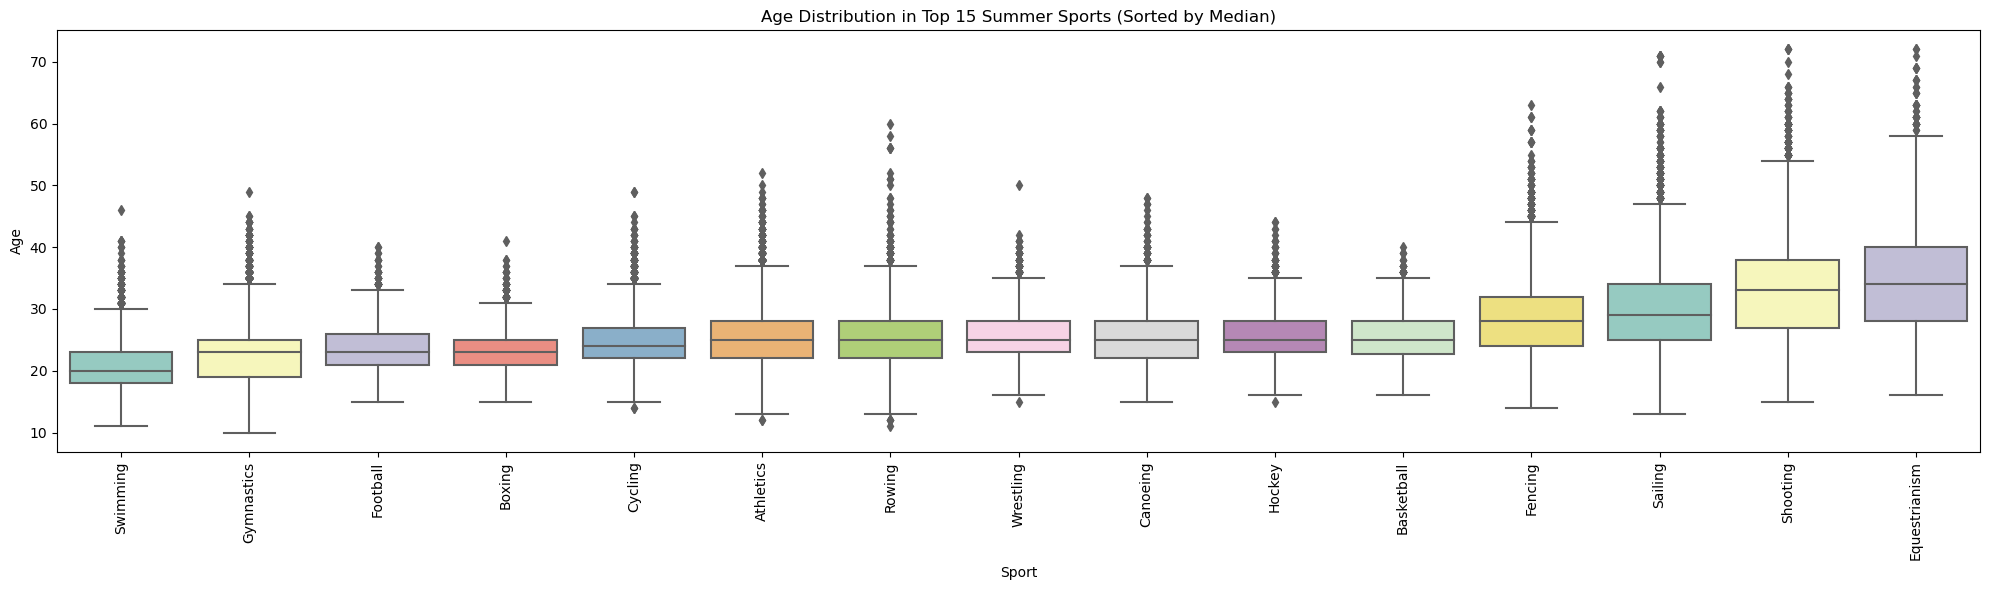

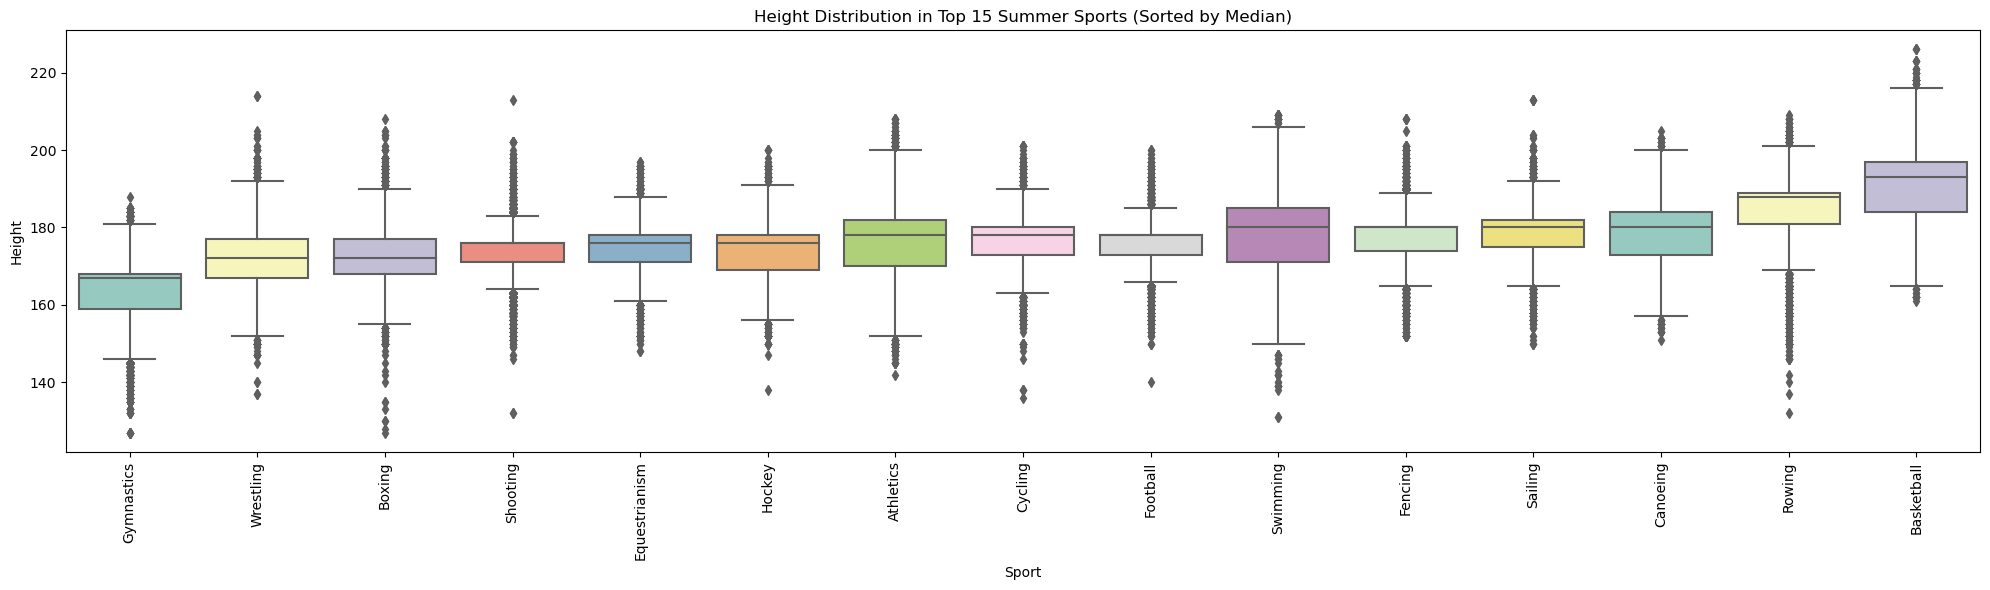

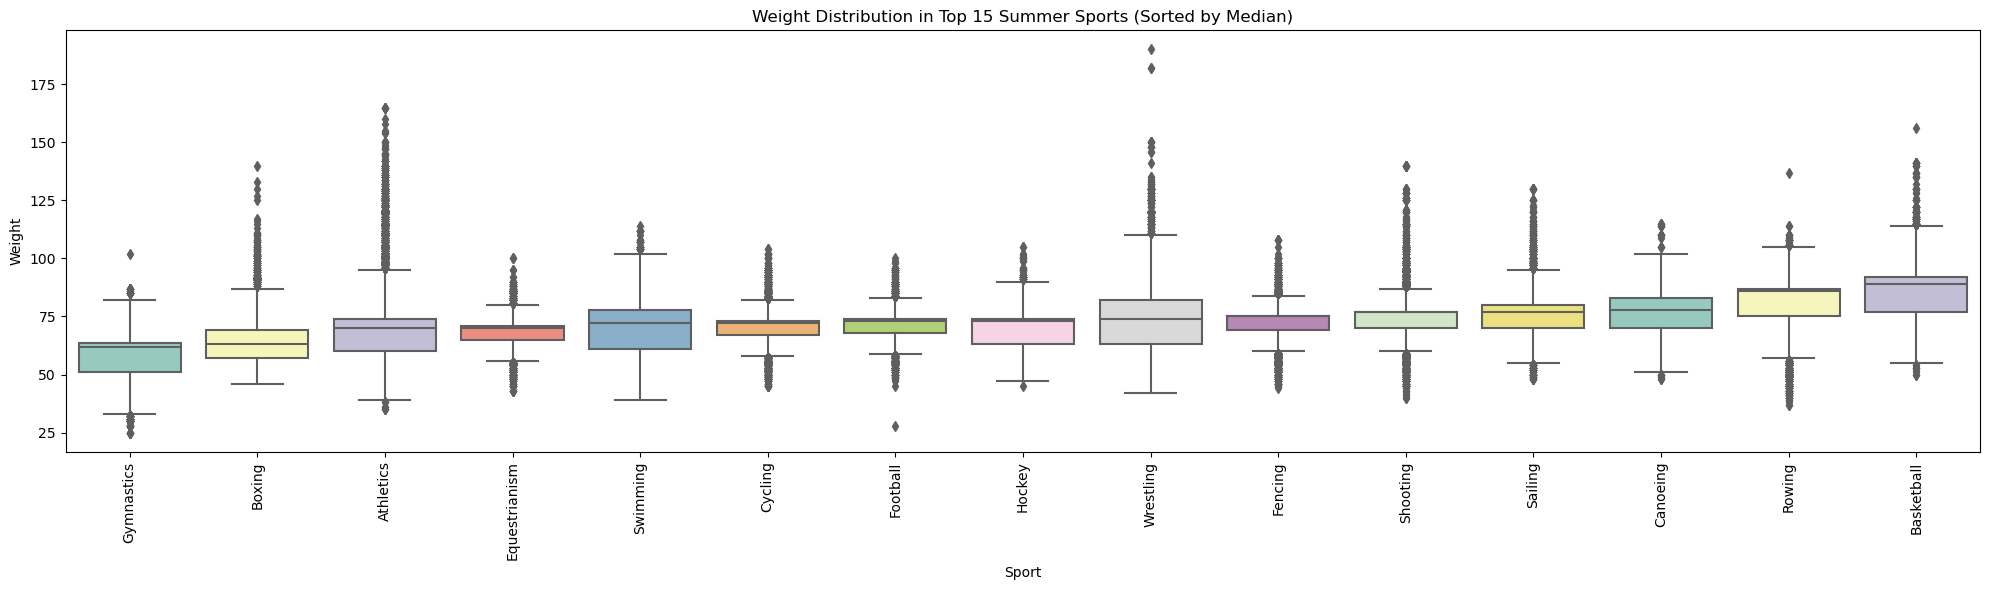

In [52]:
#Function to create BoxPlots
def create_sorted_boxplots(df, sports, attribute, season, title_part, figsize=(20, 6)):
    # Calculate the median values for each sport and sort
    median_values = df.groupby('Sport')[attribute].median().loc[sports].sort_values()
    sorted_sports = median_values.index.tolist()

    # Create the boxplot sorted by median values
    plt.figure(figsize=figsize)
    sns.boxplot(x='Sport', y=attribute, data=df, order=sorted_sports, palette='Set3')
    plt.title(f'{attribute} Distribution in Top {title_part} {season} Sports (Sorted by Median)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Generate the boxplots for top 15 summer sports for age, height, and weight
for attribute in ['Age', 'Height', 'Weight']:
    create_sorted_boxplots(top_summer_df, top_summer_sports, attribute, 'Summer', '15')


The `Age` boxplot shows the distribution across the top 15 summer sports, with gymnastics having the youngest athletes (median age around 20), while equestrianism presents the oldest (median age close to 30). The final four sports appear to deviate from the rest, which will be confirmed with a statistical test. Similarly, the `Height` boxplot reveals gymnasts as the shortest competitors and, as anticipated, basketball players as the tallest. Notably, the Height and `Weight` boxplots exhibit striking similarities across sports, suggesting a potential high correlation that will be assessed later.

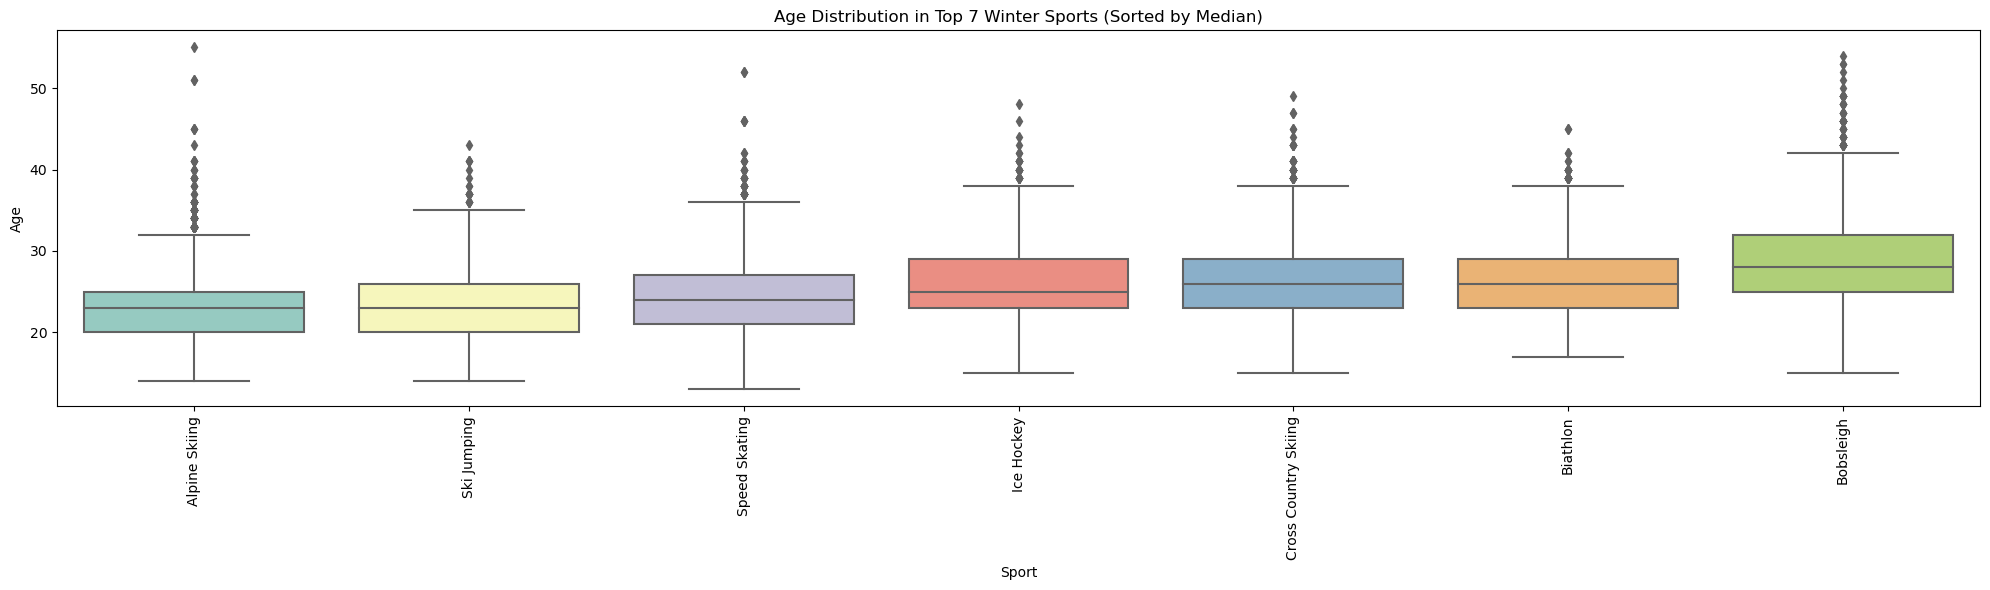

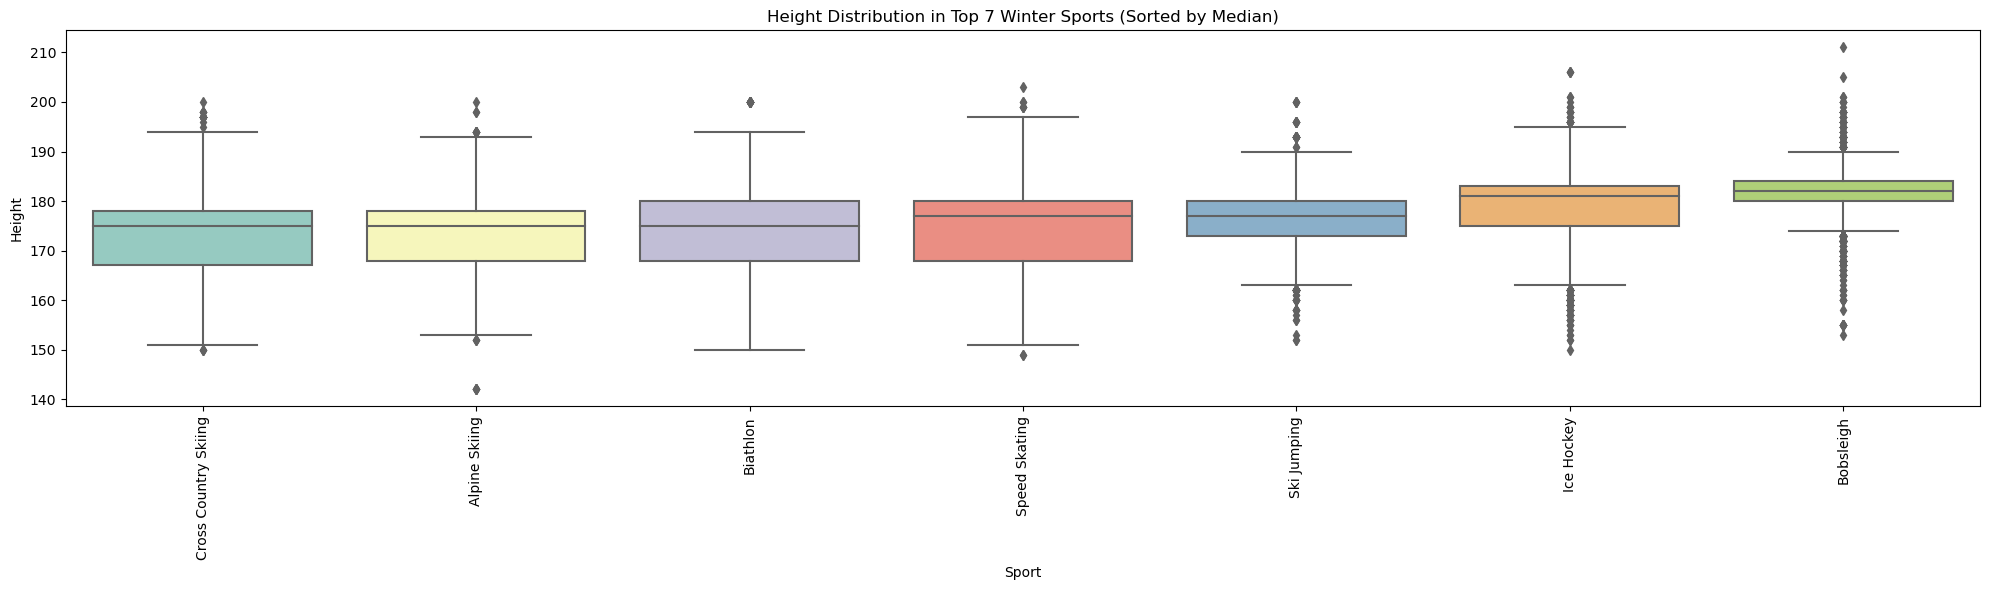

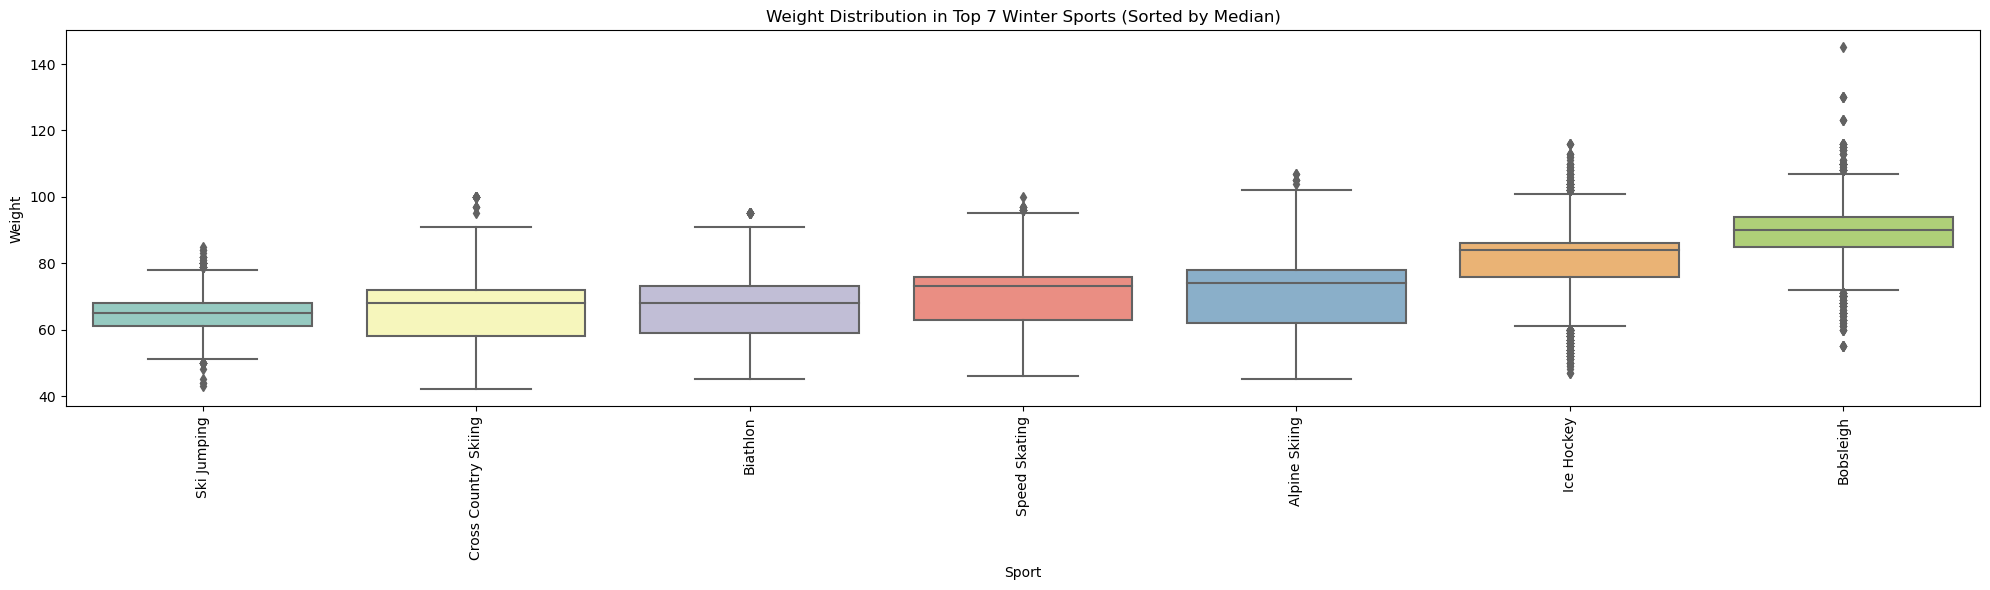

In [53]:
# Generate the sorted boxplots for top 7 winter sports for age, height, and weight
for attribute in ['Age', 'Height', 'Weight']:
    create_sorted_boxplots(top_winter_df, top_winter_sports, attribute, 'Winter', '7')

Despite a strong correlation between `Height` and `Weight` among Olympic athletes, the statistical analysis shows an inconsistency: a significant difference in average weights between summer and winter Olympics, but no significant difference in heights. This discrepancy suggests that other factors might influence athlete weights beyond height, or there could be limitations in the dataset or analysis method. For `Age`, we observed a statistically significant difference between summer and winter Olympics.

## T-Test

Test if there is a difference in characteristics between winter and summer athletes in the following variables: `Age`, `Height` and `Weight`.

H0:The hypothesis indicates that there is no variation, in the averages when comparing the Olympic Games held during the summer and winter seasons.

H1:On the contrary, the alternative hypothesis proposes that a significant disparity exists in the averages of the variable between the summer and winter seasons, in the Olympic Games.

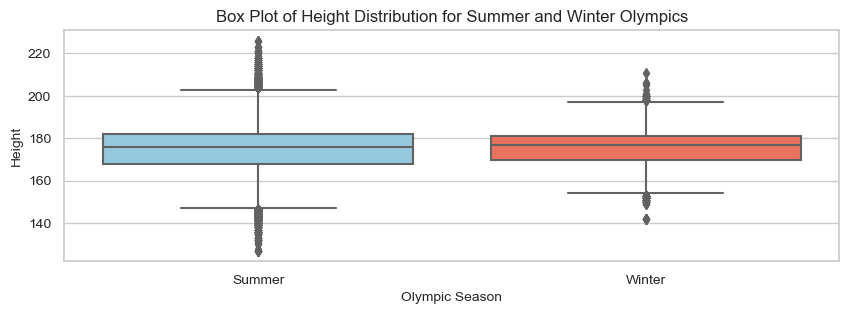

Analysis for Height
T-statistic: -0.475
P-value: 0.635
There is not enough evidence to claim that the means are different.

----------------------------------------------



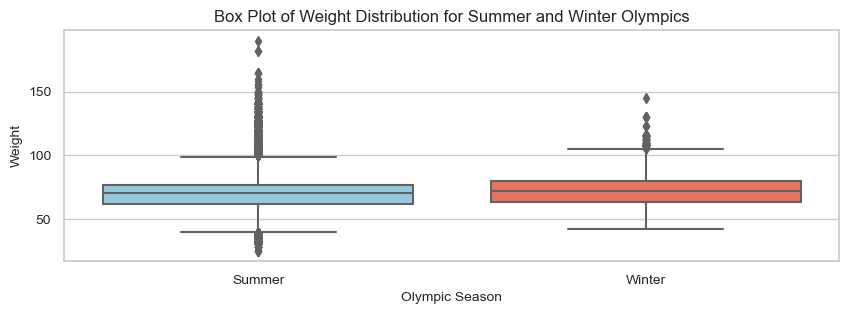

Analysis for Weight
T-statistic: -29.508
P-value: 0.000
There is a statistically significant difference in the means.

----------------------------------------------



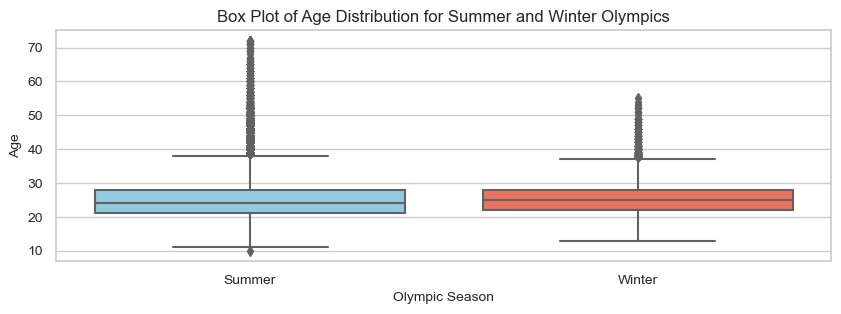

Analysis for Age
T-statistic: 3.585
P-value: 0.000
There is a statistically significant difference in the means.

----------------------------------------------



In [54]:
# List of variables to analyze
variables = ['Height', 'Weight', 'Age']

for variable in variables:
    # Split the data into summer and winter groups
    data_summer = top_summer_df[variable].dropna()
    data_winter = top_winter_df[variable].dropna()

    # Perform the independent t-test
    t_statistic, p_value = stats.ttest_ind(data_summer, data_winter, equal_var=False)

    # Visualize Box plots
    plt.figure(figsize=(10, 3))
    sns.set(style="whitegrid")
    sns.boxplot(x='Season', y=variable, data=pd.concat([top_summer_df, top_winter_df]), palette=['#87CEEB', '#FF6347'])
    plt.title(f'Box Plot of {variable} Distribution for Summer and Winter Olympics', fontsize=12)
    plt.xlabel('Olympic Season', fontsize=10)
    plt.ylabel(variable, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # Display the results
    print(f"Analysis for {variable}")
    print(f"T-statistic: {t_statistic:.3f}")
    print(f"P-value: {p_value:.3f}")

    # Interpretation
    if p_value < 0.05:
        print("There is a statistically significant difference in the means.")
    else:
        print("There is not enough evidence to claim that the means are different.")
    print("\n----------------------------------------------\n")


Despite a strong correlation between height and weight among Olympic athletes, the statistical analysis shows an inconsistency: a significant difference in average weights between summer and winter Olympics, but no significant difference in heights. This discrepancy suggests that other factors might influence athlete weights beyond height, or there could be limitations in the dataset or analysis method.

## Correlation of the characteristics of the players and the medals

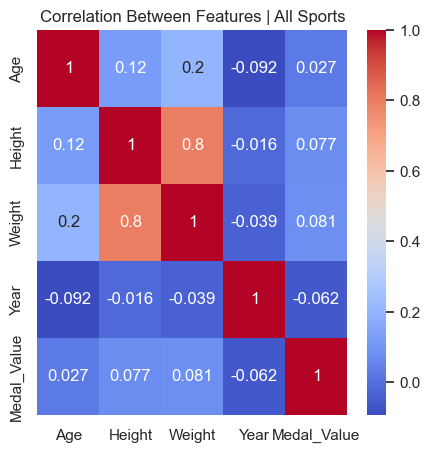

In [55]:
# Correlation between numerical variables in the dataset
olympic_df_no_id = olympic_df.drop('ID', axis=1)
plt.figure(figsize=(5, 5))
plt.title('Correlation Between Features | All Sports')
sns.heatmap(olympic_df_no_id.select_dtypes(np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

The correlation heatmap indicates a strong positive correlation between `Height` and `Weight` across the dataset, hinting that taller athletes are generally heavier. There's minimal correlation between these physical attributes and the `Year` or `Medal_Value`. To delve deeper, we'll analyze the correlations within each sport individually to uncover discipline-specific trends and attributes.

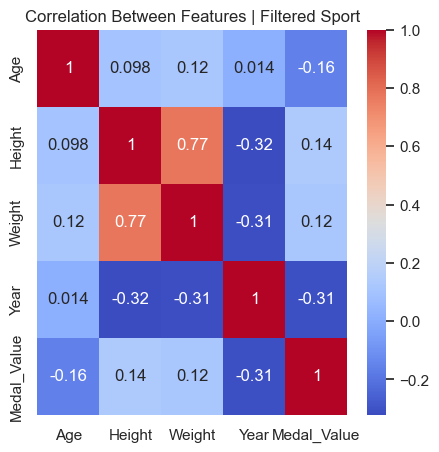

In [56]:
# Test correlation in different sports

#filtered_df = olympic_df[olympic_df['Sport'].isin(['Equestrianism'])]
#filtered_df = olympic_df[olympic_df['Sport'].isin(['Gymnastics'])]
#filtered_df = olympic_df[olympic_df['Sport'].isin(['Swimming'])]
#filtered_df = olympic_df[olympic_df['Sport'].isin(['Athletics'])]
#filtered_df = olympic_df[olympic_df['Sport'].isin(['Rowing'])]
#filtered_df = olympic_df[olympic_df['Sport'].isin(['Fencing'])]
filtered_df = olympic_df[olympic_df['Sport'].isin(['Golf'])]

filtered_df_no_id = filtered_df.drop('ID', axis=1)
plt.figure(figsize=(5, 5))
plt.title('Correlation Between Features | Filtered Sport')
sns.heatmap(filtered_df_no_id.select_dtypes(np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

We analyzed correlations across various sports disciplines and found minimal differences. This could be attributed to the database primarily including top-tier athletes who have already been preselected based on their physical attributes suited for their sports. To test this hypothesis and mitigate selection bias, a larger dataset encompassing athletes of various skill levels would be necessary. <br> 
*Note: Golf displayed the most significant variation, although all commented sports in the code were tested.*

## Medal Distribution per Countries

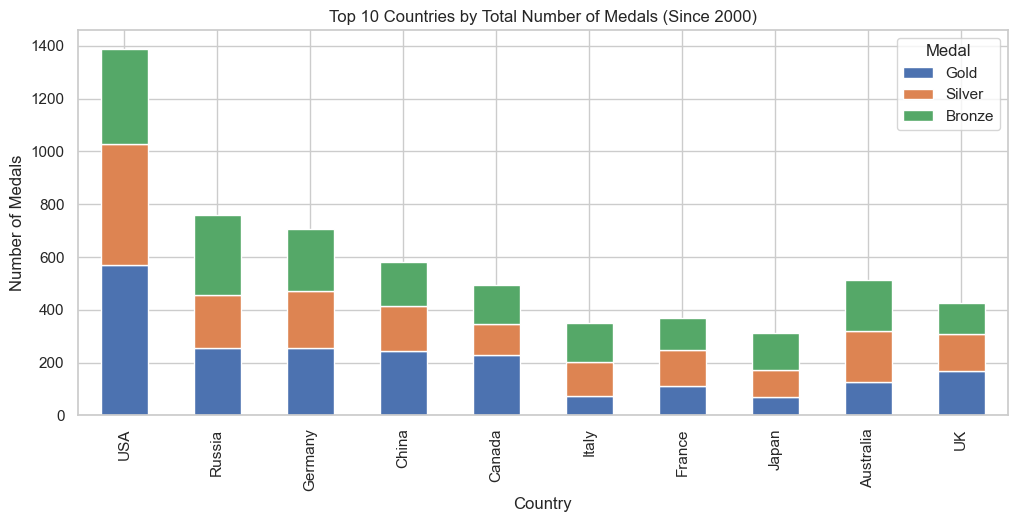

In [57]:
filtered_data = olympic_df[olympic_df['Year'] > 2000] #Considering the recent data for this analysis

# Grouped and counted according to country and medal type
medal_counts = filtered_data.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

# Calculate and rank the total number of medals for each country
medal_counts['Total'] = medal_counts.sum(axis=1)
medal_counts_sorted = medal_counts.sort_values('Total', ascending=False)

# Remove countries with zero total medals and select only the top 10 countries
top_10_countries = medal_counts_sorted[medal_counts_sorted['Total'] > 0].head(10)

# Create stacked bar charts
top_10_countries[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(12, 5))
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Top 10 Countries by Total Number of Medals (Since 2000)')
plt.show()

The chart illustrates comparable distributions of gold, silver, and bronze medals across the countries. This indicates we can simplify the medal analysis by using an aggregate Medal_Value metric, defined as:
<br> <br>
Gold = 3 points <br>
Silver = 2 points <br>
Bronze = 1 point <br>
No Medal = 0 points <br>
<br>
By calculating the average Medal_Value earned by each country, we can conduct our analysis on this single combined metric rather than examining gold, silver, and bronze separately. As the medal type distributions are relatively similar between countries, the unified Medal_Value metric serves as representative summary indicator of overall Olympic success. This simplified approach improves the clarity and comprehension of the subsequent data analysis.

## Top Performance Countries | Based in total medals & ratio of Medals/Participants

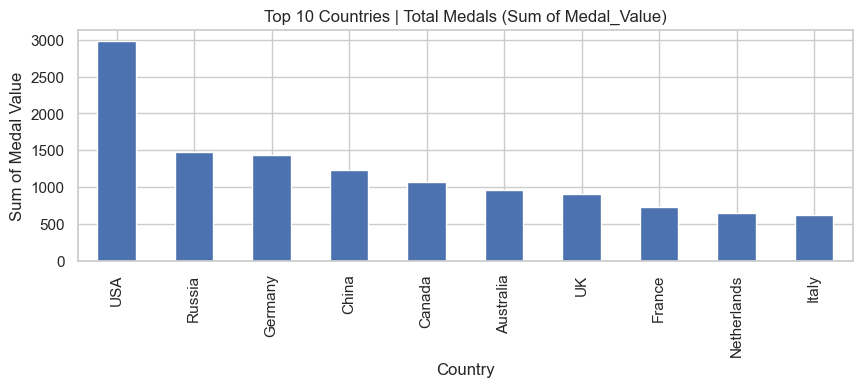

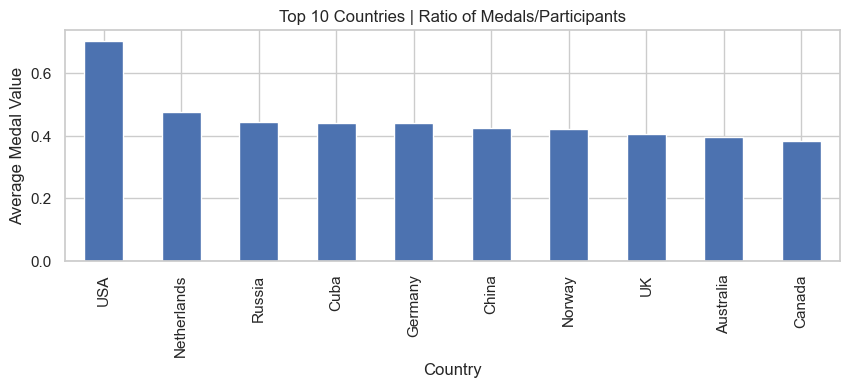

In [58]:
participant_counts = filtered_data.groupby(['Country', 'Year'])['Name'].count().reset_index()
eligible_countries = participant_counts[participant_counts['Name'] >= 100]['Country'].unique() #Filtering countries with good volume
eligible_data = olympic_df[(olympic_df['Country'].isin(eligible_countries)) & (olympic_df['Year'] > 2000)]
eligible_data

# Calculate the sum of Medal_Value for each country
medal_value_sum = eligible_data.groupby('Country')['Medal_Value'].sum()

# Calculate the sum of Medal_Value for each country
participant_counts_total = eligible_data['Country'].value_counts()

# Calculated ratios
average_medal_value = medal_value_sum / participant_counts_total

# In descending order
average_medal_value_sorted = average_medal_value.sort_values(ascending=False)
average_medal_value_sorted

# Filter out and sort countries with zero Medal_Value sums
non_zero_medal_sum_sorted = medal_value_sum[medal_value_sum > 0].sort_values(ascending=False)

# Top 10 countries with the highest sum of choices
top_10_medal_values = non_zero_medal_sum_sorted.head(10)

# Create bar charts
plt.figure(figsize=(10, 3)) 
top_10_medal_values.plot(kind='bar')  
plt.xlabel('Country') 
plt.ylabel('Sum of Medal Value') 
plt.title('Top 10 Countries | Total Medals (Sum of Medal_Value)') 
plt.show()  


# Select the top ten countries with the highest average Medal_Value
top_10_countries_avg = average_medal_value_sorted.head(10)

# Create bar charts
plt.figure(figsize=(10, 3))  
top_10_countries_avg.plot(kind='bar') 
plt.xlabel('Country')  
plt.ylabel('Average Medal Value') 
plt.title('Top 10 Countries | Ratio of Medals/Participants')  
plt.show() 


The United States, Russia, Germany and China are top performers in both total medals and medals per athlete, indicating consistently large and successful Olympic teams. Meanwhile, the **Netherlands** and **Cuba** excel in producing smaller contingents of very high quality athletes that earn medals at a rate rivalling or exceeding larger sports powers, demonstrating effectiveness in maximizing talent. This allows them to “punch above their weight” despite modest participation numbers.

## Historical Analysis

The following visualizations offer a historical analysis of the Top Performer Countries, showcasing their evolution overtime.

In [59]:
# Generate the top 10 countries list for Summer in recent years
top_summer_countries = summer_df.groupby('Country')['Medal_Value'].sum().nlargest(10).index.tolist()
top_summer_countries

['USA',
 'Russia',
 'Germany',
 'UK',
 'France',
 'Italy',
 'Australia',
 'Hungary',
 'Sweden',
 'China']

In [60]:
# Generate the top 10 countries list for Winter
top_winter_countries = winter_df.groupby('Country')['Medal_Value'].sum().nlargest(10).index.tolist()
top_winter_countries

['Russia',
 'Canada',
 'Germany',
 'USA',
 'Norway',
 'Sweden',
 'Finland',
 'Austria',
 'Switzerland',
 'Czech Republic']

In [61]:
# Function to create the stacked area chart
def prepare_stacked_area_data(df, top_countries):
    medal_values_by_year = df.groupby(['Year', 'Country'])['Medal_Value'].sum().reset_index()
    medal_values_pivot = medal_values_by_year.pivot(index='Year', columns='Country', values='Medal_Value').fillna(0)
    medal_values_pivot = medal_values_pivot[top_countries]
    medal_values_pivot.replace(0, np.nan, inplace=True)
    medal_values_pivot.fillna(method='ffill', axis=0, inplace=True)
    medal_values_pivot.fillna(0, inplace=True)
    
    return medal_values_pivot

# Prepare the data for the charts
summer_medals_pivot = prepare_stacked_area_data(summer_df, top_summer_countries)

#Validation
summer_medals_pivot

Country,USA,Russia,Germany,UK,France,Italy,Australia,Hungary,Sweden,China
Year,,,,,,,,,,
1896,49.0,0.0,87.0,18,25,0.0,7,11.0,0.0,0.0
1900,130.0,0.0,93.0,189,389,13.0,12,9.0,10.0,0.0
1904,785.0,0.0,29.0,5,4,13.0,7,9.0,10.0,0.0
1906,54.0,0.0,68.0,79,120,106.0,3,28.0,30.0,0.0
1908,146.0,7.0,40.0,743,69,18.0,51,41.0,198.0,0.0
1912,224.0,19.0,94.0,328,57,70.0,22,67.0,458.0,0.0
1920,457.0,19.0,94.0,245,236,227.0,13,67.0,296.0,0.0
1924,404.0,19.0,94.0,118,235,106.0,21,38.0,108.0,0.0
1928,206.0,19.0,133.0,97,98,142.0,8,52.0,59.0,0.0


In [62]:
winter_medals_pivot = prepare_stacked_area_data(winter_df, top_winter_countries)

#Validation
winter_medals_pivot

Country,Russia,Canada,Germany,USA,Norway,Sweden,Finland,Austria,Switzerland,Czech Republic
Year,,,,,,,,,,
1924,0.0,27,0.0,24,32,19,23,11,13.0,0.0
1928,0.0,36,5.0,32,31,33,9,10,12.0,1.0
1932,0.0,49,14.0,75,20,7,6,5,4.0,1.0
1936,0.0,26,18.0,20,40,16,19,9,24.0,1.0
1948,0.0,41,18.0,32,24,30,17,13,41.0,34.0
1952,0.0,49,30.0,63,39,23,28,16,6.0,34.0
1956,94.0,22,4.0,49,9,23,28,25,24.0,34.0
1960,63.0,44,21.0,69,21,21,26,10,6.0,2.0
1964,115.0,17,20.0,12,27,61,28,36,6.0,17.0


### Stacked Area Chart | Historical Medals Performance per Country 

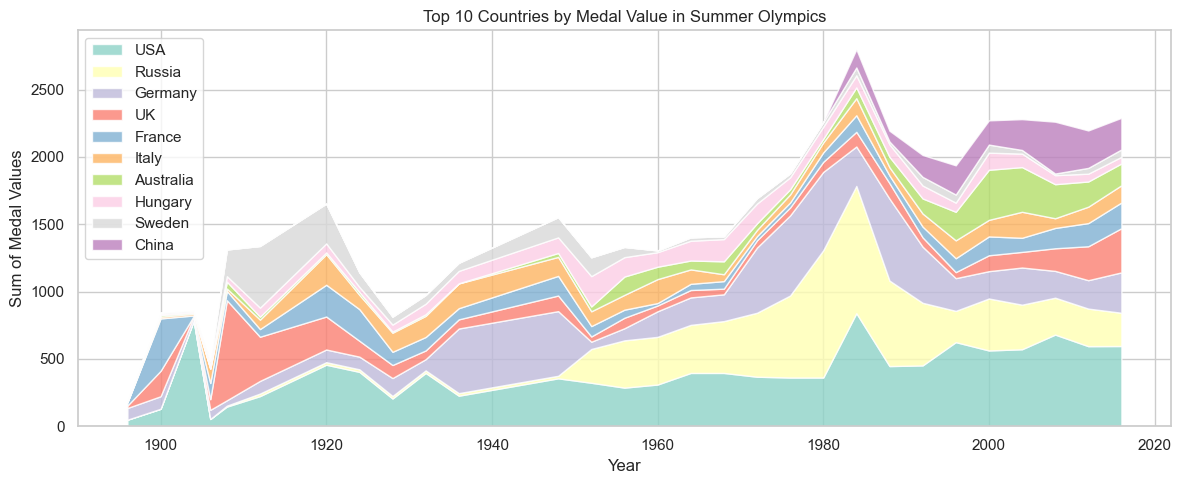

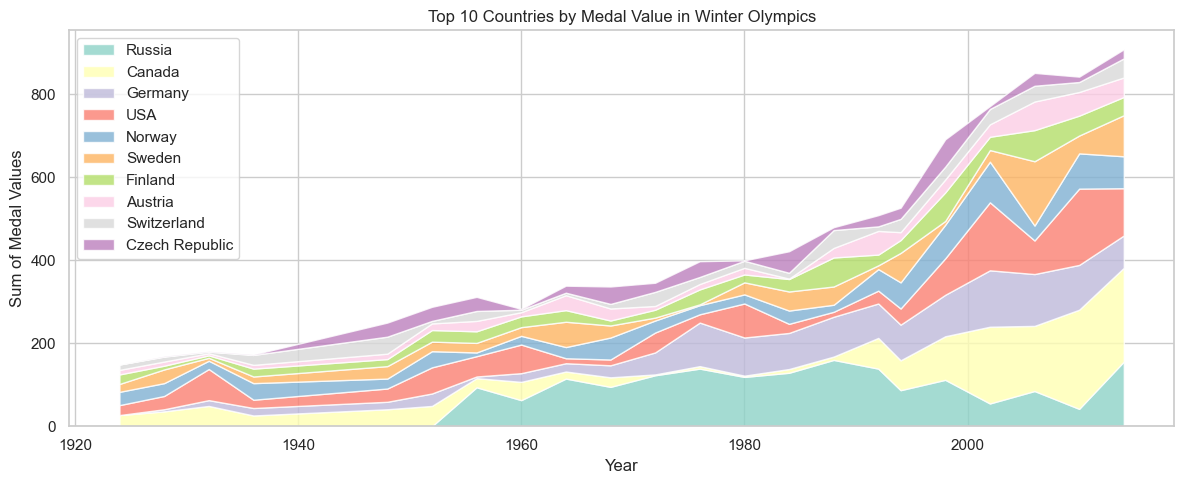

In [63]:
# Define the function to create the stacked area chart
def create_stacked_area_chart(df, title):
    palette = sns.color_palette('Set3', n_colors=len(df.columns))
    plt.figure(figsize=(12, 5))
    plt.stackplot(df.index, df.T, labels=df.columns, colors=palette, alpha=0.8)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Sum of Medal Values')
    plt.legend(loc='upper left')
    plt.tight_layout()
    
    plt.show()

# Create the charts for Summer 
create_stacked_area_chart(summer_medals_pivot, 'Top 10 Countries by Medal Value in Summer Olympics')
# Create the charts for Winter
create_stacked_area_chart(winter_medals_pivot, 'Top 10 Countries by Medal Value in Winter Olympics')

The graphs above have a problem when we try to analyze the Countries within years because it has a significant growing trend in the number of the medals. In this case, a relative plot (100%) can help to complement the views; the conclusions are going to be assessed later in this code.

### 100% Stacked Area Chart | Historical Medals Performance per Country

In [64]:
# Create the 100% stacked area chart

# Function to normalize the data for a 100% stacked area chart
def normalize_data_for_stacked_area(df):
    yearly_totals = df.sum(axis=1)
    df_normalized = df.div(yearly_totals, axis=0)
    df_normalized.fillna(0, inplace=True)
    
    return df_normalized

# Normalize the data for Summer Olympics
normalized_summer_data = normalize_data_for_stacked_area(summer_medals_pivot)

#Validation
normalized_summer_data

Country,USA,Russia,Germany,UK,France,Italy,Australia,Hungary,Sweden,China
Year,,,,,,,,,,
1896,0.248731,0.000000,0.441624,0.091371,0.126904,0.000000,0.035533,0.055838,0.000000,0.000000
1900,0.153846,0.000000,0.110059,0.223669,0.460355,0.015385,0.014201,0.010651,0.011834,0.000000
1904,0.910673,0.000000,0.033643,0.005800,0.004640,0.015081,0.008121,0.010441,0.011601,0.000000
1906,0.110656,0.000000,0.139344,0.161885,0.245902,0.217213,0.006148,0.057377,0.061475,0.000000
1908,0.111196,0.005331,0.030465,0.565880,0.052551,0.013709,0.038842,0.031226,0.150800,0.000000
1912,0.167289,0.014190,0.070202,0.244959,0.042569,0.052278,0.016430,0.050037,0.342046,0.000000
1920,0.276300,0.011487,0.056832,0.148126,0.142684,0.137243,0.007860,0.040508,0.178960,0.000000
1924,0.353456,0.016623,0.082240,0.103237,0.205599,0.092738,0.018373,0.033246,0.094488,0.000000
1928,0.253071,0.023342,0.163391,0.119165,0.120393,0.174447,0.009828,0.063882,0.072482,0.000000


In [65]:
# Normalize the data for Winter Olympics
normalized_winter_data = normalize_data_for_stacked_area(winter_medals_pivot)

#Validation
normalized_winter_data

Country,Russia,Canada,Germany,USA,Norway,Sweden,Finland,Austria,Switzerland,Czech Republic
Year,,,,,,,,,,
1924,0.000000,0.181208,0.000000,0.161074,0.214765,0.127517,0.154362,0.073826,0.087248,0.000000
1928,0.000000,0.213018,0.029586,0.189349,0.183432,0.195266,0.053254,0.059172,0.071006,0.005917
1932,0.000000,0.270718,0.077348,0.414365,0.110497,0.038674,0.033149,0.027624,0.022099,0.005525
1936,0.000000,0.150289,0.104046,0.115607,0.231214,0.092486,0.109827,0.052023,0.138728,0.005780
1948,0.000000,0.164000,0.072000,0.128000,0.096000,0.120000,0.068000,0.052000,0.164000,0.136000
1952,0.000000,0.170139,0.104167,0.218750,0.135417,0.079861,0.097222,0.055556,0.020833,0.118056
1956,0.301282,0.070513,0.012821,0.157051,0.028846,0.073718,0.089744,0.080128,0.076923,0.108974
1960,0.222615,0.155477,0.074205,0.243816,0.074205,0.074205,0.091873,0.035336,0.021201,0.007067
1964,0.339233,0.050147,0.058997,0.035398,0.079646,0.179941,0.082596,0.106195,0.017699,0.050147


In [66]:
# Plot the 100% stacked area chart
def plot_100_percent_stacked_area(df, season):
    fig, ax = plt.subplots(figsize=(15, 8))
    cumulative = np.zeros(len(df))
    palette = sns.color_palette('Set3', n_colors=len(df.columns))

    for i, column in enumerate(df.columns):
        plt.fill_between(df.index, cumulative, cumulative + df[column], color=palette[i], label=column)
        cumulative += df[column]
    
    # Customize the plot
    ax.set_title(f'100% Stacked Area Chart of Medal Values for {season} Olympics')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Total Medal Values')
    plt.legend(loc='upper left')
    plt.tight_layout()
    
    plt.show()


### **Highlights in the Summer Olympics History**

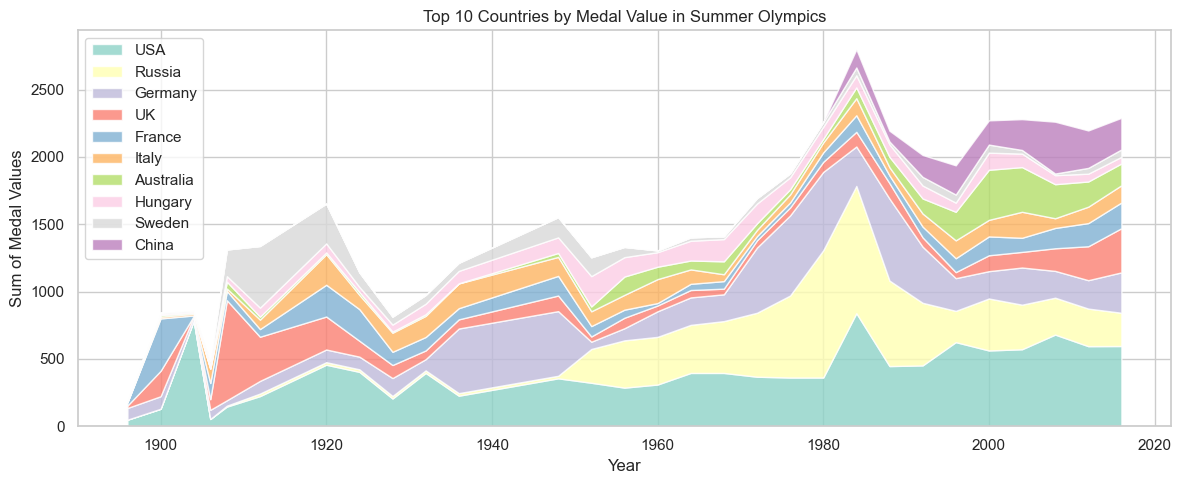

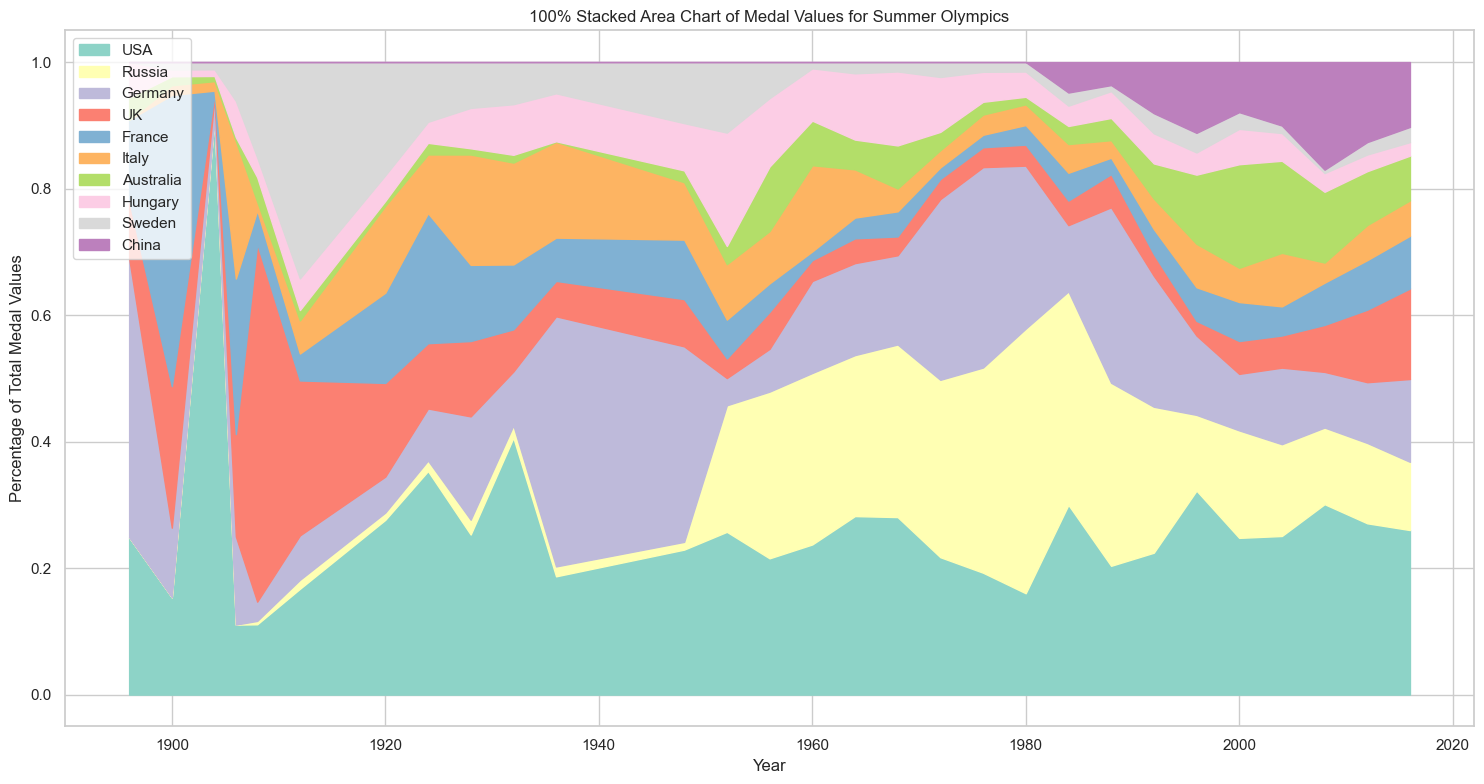

In [67]:
# Create both charts for Summer to compare them and assess the results
create_stacked_area_chart(summer_medals_pivot, 'Top 10 Countries by Medal Value in Summer Olympics')
plot_100_percent_stacked_area(normalized_summer_data, 'Summer')


In our historical analysis of Olympic data, we've pinpointed trends and their potential causes: <br>- **1920s-1930s** saw a surge in medals linked to the geopolitical aftermath of WWI and sports propaganda by rising regimes. <br>- **Post-1945** featured a boost, likely due to the exclusion of Germany and Japan post-WWII. <br>- During the **1950s-1960s**, the Cold War era's US-USSR rivalry extended into the Olympics. <br>- The **1980-1984** period was marked by boycotts affecting medal distributions. <br>- Late 20th Century trends reflect China's ascent in sports, and since the **2000s**, a leveling off suggests a broader medal spread and athlete professionalization.


### **Highlights in the Winter Olympics History**

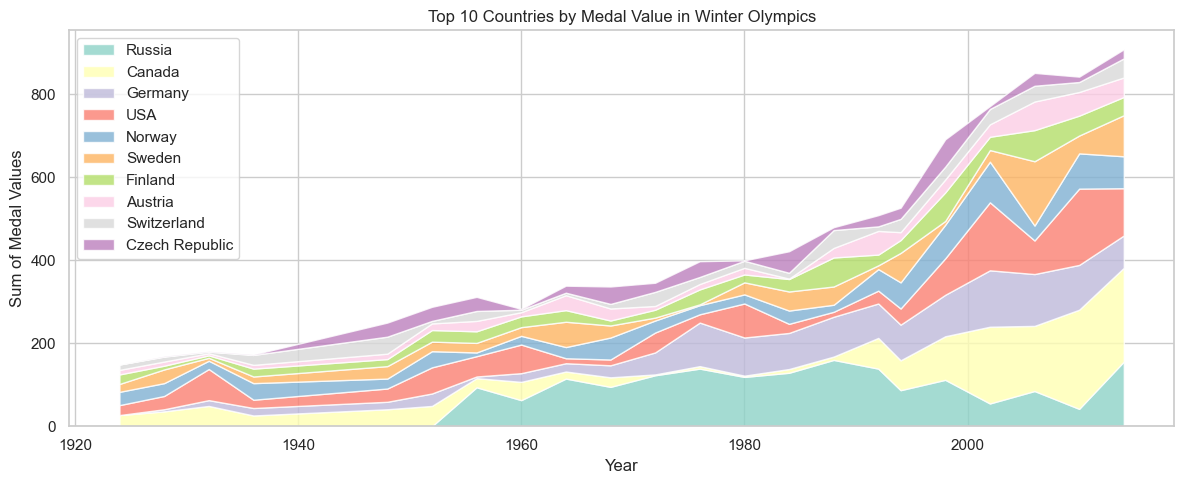

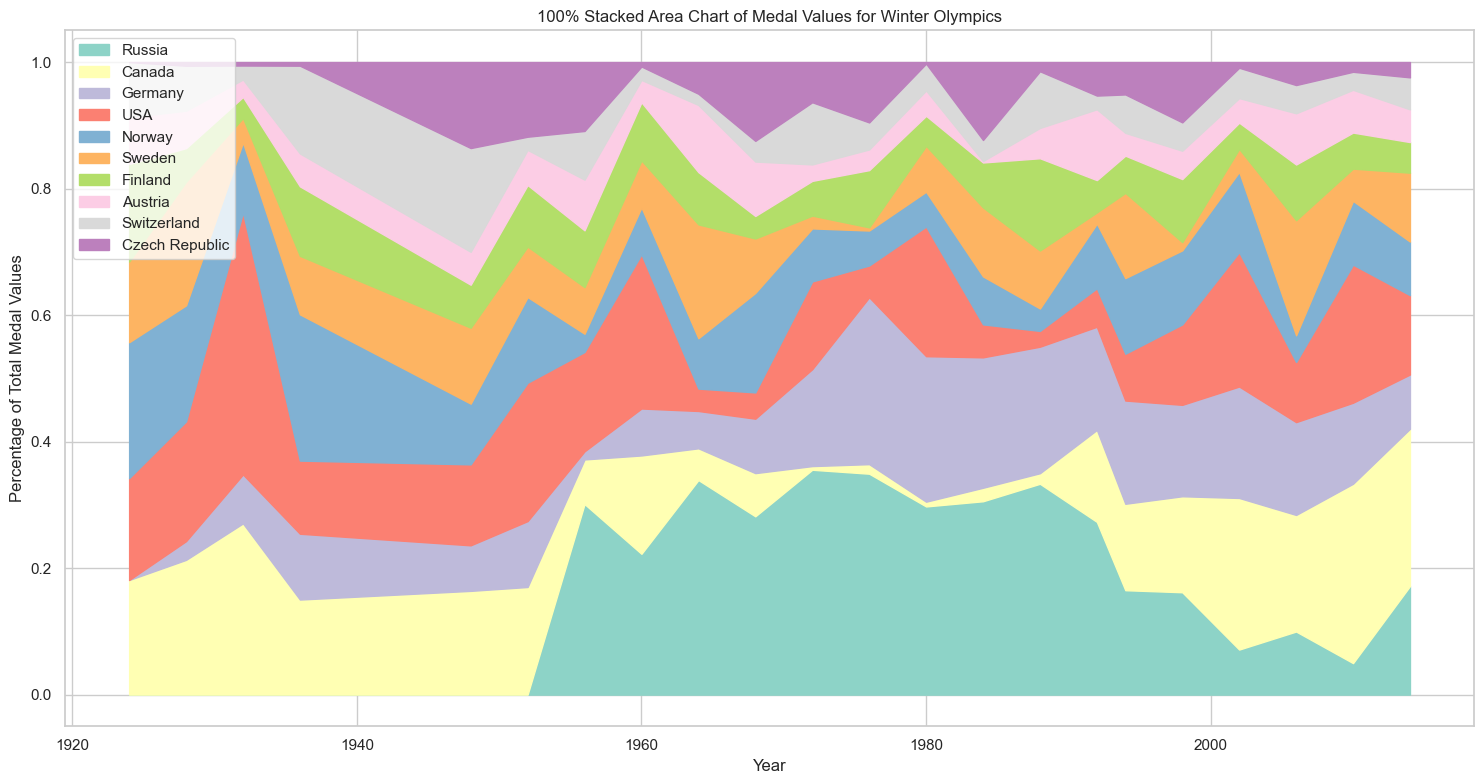

In [68]:
# Create both charts for Winter to compare them and assess the results
create_stacked_area_chart(winter_medals_pivot, 'Top 10 Countries by Medal Value in Winter Olympics')
plot_100_percent_stacked_area(normalized_winter_data, 'Winter')

The historical Olympic data reveals trends: <br>- The **1920s-1930s** surge in medals likely reflects the growing appeal of winter sports. <br>- Post-WWII, a medal uptick corresponds with the resumption of international competitions, while Germany's **1948** absence is notable. <br>- The **1970s-1980s** increases mirror Cold War dynamics, with sports success symbolizing national prowess, especially between the USA and USSR. <br>- The **1990s** see changes as the USSR dissolves, and athletes represent new countries. <br>- In the **2000s-2010s**, nations like Canada and the USA show rising medal counts, possibly due to greater sports investments and benefits from hosting events.

## Historical average medals per country

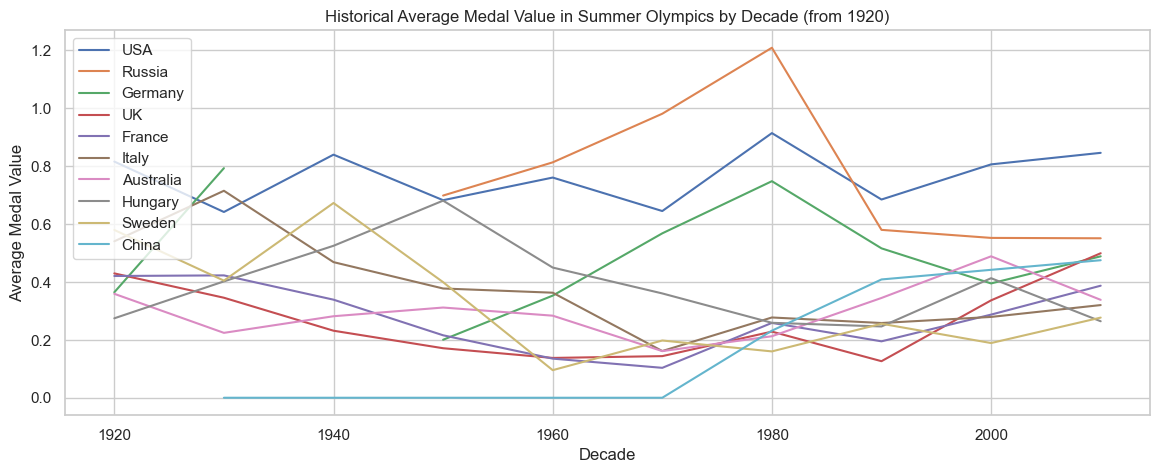

In [69]:
# Function to calculate historical average medal value by decade for years >= 1920
def historical_avg_medal_value_by_decade(df, countries):
    df['Decade'] = (df['Year'] // 10) * 10
    filtered_df = df[(df['Year'] >= 1920) & (df['Country'].isin(countries))]
    return filtered_df.groupby(['Decade', 'Country'])['Medal_Value'].mean().reset_index()

# Calculate historical average for Summer Olympics by decade
historical_avg_summer = historical_avg_medal_value_by_decade(summer_df, top_summer_countries)

# Plot the line chart for historical average medal value for Summer Olympics by decade
plt.figure(figsize=(14, 5))
for country in top_summer_countries:
    # Filter the country_df for each country to include only the decades where the year is >= 1920
    country_df = historical_avg_summer[(historical_avg_summer['Country'] == country) & (historical_avg_summer['Decade'] >= 1920)]
    plt.plot(country_df['Decade'], country_df['Medal_Value'], marker='', label=country)

plt.title('Historical Average Medal Value in Summer Olympics by Decade (from 1920)')
plt.xlabel('Decade')
plt.ylabel('Average Medal Value')
plt.legend()
plt.show()

The chart displays the fluctuating average medal counts for various countries in the Summer Olympics by decade, starting from 1920. The USA shows strong and consistent Olympic performance, peaking in the 1980s. Russia's medal haul rises after the 1950s, while Germany's increases from the 1960s. China's average medals surge from the 1980s, indicating its rising Olympic prominence. Other nations like the UK, France, and Italy show no consistent trend over the years.

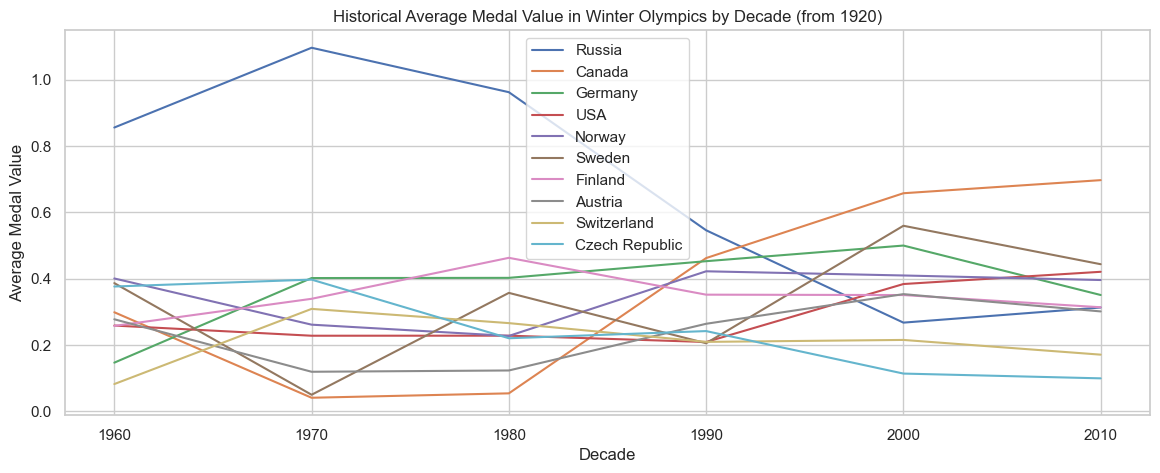

In [70]:
# Calculate historical average for Summer Olympics by decade
historical_avg_winter = historical_avg_medal_value_by_decade(winter_df, top_winter_countries)

# Plot the line chart for historical average medal value for Summer Olympics by decade
plt.figure(figsize=(14, 5))
for country in top_winter_countries:
    # Filter the country_df for each country to include only the decades where the year is >= 1920
    country_df = historical_avg_winter[(historical_avg_winter['Country'] == country) & (historical_avg_winter['Decade'] >= 1960)]
    plt.plot(country_df['Decade'], country_df['Medal_Value'], marker='', label=country)

plt.title('Historical Average Medal Value in Winter Olympics by Decade (from 1920)')
plt.xlabel('Decade')
plt.ylabel('Average Medal Value')
plt.legend()
plt.show()

Unlike the Summer Olympics graph, which displayed a peak for the USA around the 1980s and a notable rise for China in the later decades, the Winter graph shows Russia ascending in the later years along with consistent gains for Canada and Germany. The USA shows steadiness in both graphs, but without the dominant peaks seen in the Summer graph. Nordic countries like Norway and Sweden exhibit fluctuating results in the Winter Games, which is in contrast to their less prominent Summer Games performance. 

## Comparing Average Medal Values in different Time Periods

In [71]:
# Helper function to calculate average Medal_Value by period
def calculate_avg_medal_value_by_period(df, countries, start_year, end_year):
    period_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year) & (df['Country'].isin(countries))]
    return period_df.groupby('Country')['Medal_Value'].mean().sort_values(ascending=False)

# Filter the DataFrame for the relevant countries
summer_df = olympic_df[(olympic_df['Season'] == 'Summer') & (olympic_df['Country'].isin(top_summer_countries))]
winter_df = olympic_df[(olympic_df['Season'] == 'Winter') & (olympic_df['Country'].isin(top_winter_countries))]

# Calculate averages for the two periods
summer_avg_1920_2000 = calculate_avg_medal_value_by_period(summer_df, top_summer_countries, 1920, 2000)
summer_avg_2000_onwards = calculate_avg_medal_value_by_period(summer_df, top_summer_countries, 2000, olympic_df['Year'].max())
winter_avg_1920_2000 = calculate_avg_medal_value_by_period(winter_df, top_winter_countries, 1920, 2000)
winter_avg_2000_onwards = calculate_avg_medal_value_by_period(winter_df, top_winter_countries, 2000, olympic_df['Year'].max())

In [72]:
# Plotting function for clustered column chart
def plot_clustered_column_chart(avg_1, avg_2, countries, title):
    labels = countries
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    palette1 = ['skyblue' for _ in labels]  # Color for the first bar
    palette2 = ['salmon' for _ in labels]  # Color for the second bar

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, avg_1.reindex(labels), width, label='1920-2000', color=palette1)
    rects2 = ax.bar(x + width/2, avg_2.reindex(labels), width, label='2000 Onwards', color=palette2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average Medal Value')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

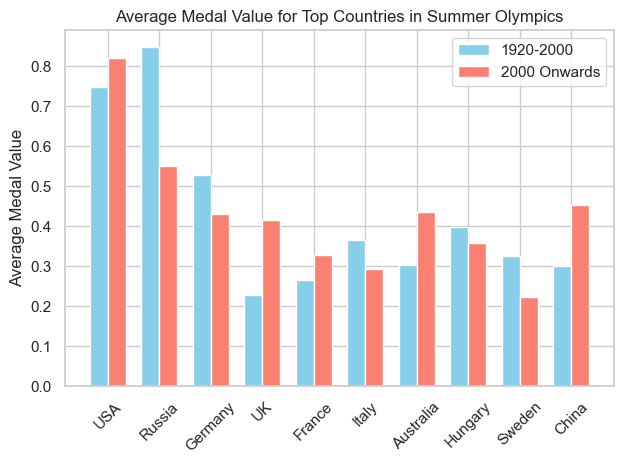

In [73]:
# Plot the clustered column chart for Summer Olympics
plot_clustered_column_chart(summer_avg_1920_2000, summer_avg_2000_onwards, top_summer_countries, 'Average Medal Value for Top Countries in Summer Olympics')

The bar chart compares the average medal value for top-performing countries in the Summer Olympics before and after the year 2000. Historically strong competitors like the USA and Russia show a slight decrease in average medal value in the more recent period, potentially reflecting increased competition and the rise of new contenders. Notably, China's average medal value shows a significant increase post-2000, indicative of the country's focused investment in sports and its emergence as a major Olympic power in the 21st century.


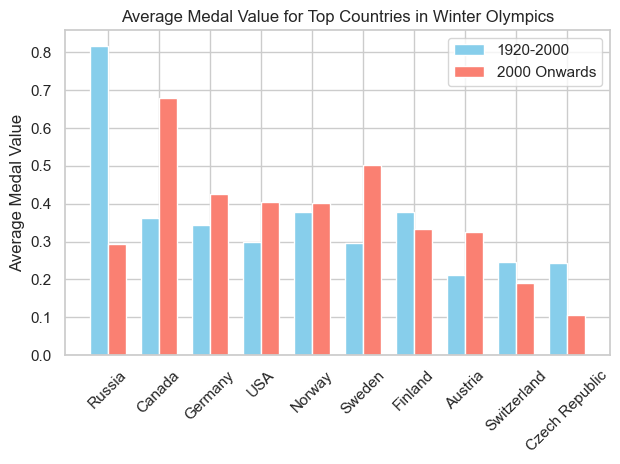

In [74]:
# Plot the clustered column chart for Winter Olympics
plot_clustered_column_chart(winter_avg_1920_2000, winter_avg_2000_onwards, top_winter_countries, 'Average Medal Value for Top Countries in Winter Olympics')

The chart presents average medal values for key countries in the Winter Olympics, contrasting the periods 1920-2000 and 2000 onwards. Russia's average medal value notably declines post-2000, possibly reflecting the impact of geopolitical changes and the emergence of new competitors. Canada shows a marked improvement, which may correlate with increased investment in winter sports infrastructure and training programs, particularly around the 2010 Vancouver Olympics.

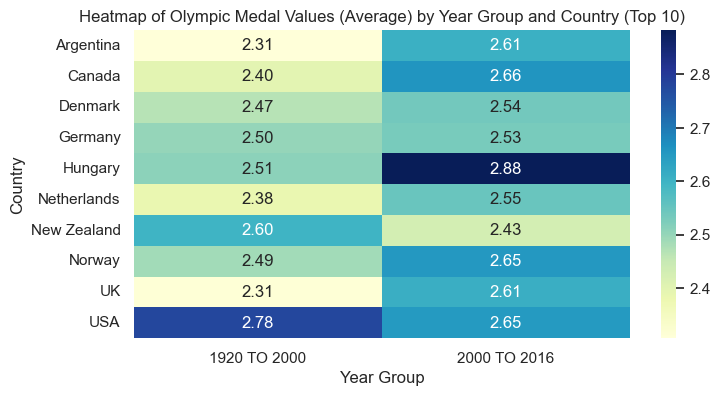

Chi-Square Statistic: 0.06
P-value: 1.00e+00
Degrees of Freedom: 9
Expected Frequencies:


In [75]:
# Assuming 'Year' is a column in the 'olympic_df' DataFrame
olympic_df['YearGroup'] = pd.cut(olympic_df['Year'], bins=[1920, 2000, float('inf')], labels=['1920 TO 2000', '2000 TO 2016'])

# Counting the total number of Olympics for each country
total_olympics_per_country = olympic_df.groupby('Country')['Year'].nunique()

# Filtering countries that participated in at least 30 Olympics
active_countries = total_olympics_per_country[total_olympics_per_country >= 30].index

# Filtering out entries where no medals were won and including only active countries
medal_data = olympic_df[(olympic_df['Medal'] != 'None') & (olympic_df['Country'].isin(active_countries))]

# Aggregating the mean of Medal_Value for each country in each year group
medal_value_mean = medal_data.groupby(['Country', 'YearGroup'])['Medal_Value'].mean().reset_index()

# Get the top 10 countries based on average Medal_Value
top_countries = medal_value_mean.groupby('Country')['Medal_Value'].mean().nlargest(10).index

# Filter the data for the top 10 countries
medal_value_mean_top10 = medal_value_mean[medal_value_mean['Country'].isin(top_countries)]

# Create a pivot table for seaborn's heatmap
pivot_table_mean = medal_value_mean_top10.pivot_table(index='Country', columns='YearGroup', values='Medal_Value', fill_value=0)

# Adding a small constant to avoid zero counts
pivot_table_mean_adjusted = pivot_table_mean + 0.5

# Performing the Chi-Squared Test of Independence on the adjusted data
chi2_value_mean_adjusted, p_value_mean_adjusted, dof_mean_adjusted, expected_mean_adjusted = chi2_contingency(pivot_table_mean_adjusted)

# Visualizing the observed average Medal_Value as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table_mean_adjusted, annot=True, cmap="YlGnBu", fmt='.2f', cbar=True)
plt.title('Heatmap of Olympic Medal Values (Average) by Year Group and Country (Top 10)')
plt.xlabel('Year Group')
plt.ylabel('Country')
plt.show()

# Printing the Chi-Square Test Result
print(f"Chi-Square Statistic: {chi2_value_mean_adjusted:.2f}")
print(f"P-value: {p_value_mean_adjusted:.2e}")
print(f"Degrees of Freedom: {dof_mean_adjusted}")
print("Expected Frequencies:")
# print(expected_mean_adjusted)

The heatmap indicates an overall increase in the average Olympic medal values for the shown countries from 1920 to 2000 compared to 2000 to 2016. The USA and Hungary show the most significant increases in average values. The chi-square statistic is low (0.06), but the p-value presented is effectively zero, suggesting a statistically significant difference in the medal values between the two periods for these countries.

# Conclusion

Our analysis of 120 years of Olympic data confirmed the hypothesis that countries like the **USA, China, Germany, Russia and Canada** lead historically in total medal counts. However, in terms of overall athlete quality, the top countries were the **USA, Russia, Cuba, Germany and the Netherlands** when weighting total medals by participant counts. <br> <br>
Analyzing the data, we could observe that physical attributes like `Height`, `Weight` and `Age` have low incidence in the performance of the athletes within each sport. Aside, there is a minimal correlation between sports that suggest a preselection of top-tier athletes based on generalized athletic attributes, which are suited for Olympics-caliber events. To confirm this, datasets encompassing wider skill levels could help mitigate selection bias.<br> <br>
Furthermore, we traced distinct medal trends tied to geopolitics, like post-WWI and WWII impacts, Cold War rivalry, political boycotts, and countries sports investments. While absolute medals have settled recently, we can see a **difference of medal count by country after the 2000’s**; for instance, countries like China have improved their performance, while Russia has seen a decrease in medals after the dismantle of the USSR.<br> <br>
In conclusion, our multifaceted Olympic analysis revealed insights into sports competitiveness, quantified both absolute and relative success over time, and highlighted the ongoing interplay of geopolitics and national priorities. The findings demonstrate that countries who invest in focused athlete development leads to achieve outsized accomplishments on the world stage and pride for the nation.